In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Jillian/Desktop/Thinkful Data Files/BlackFriday.csv')

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
df['Product_Category_2'].fillna('Unknown',inplace=True)
df['Product_Category_3'].fillna('Unknown',inplace=True)
#df = df.dropna()

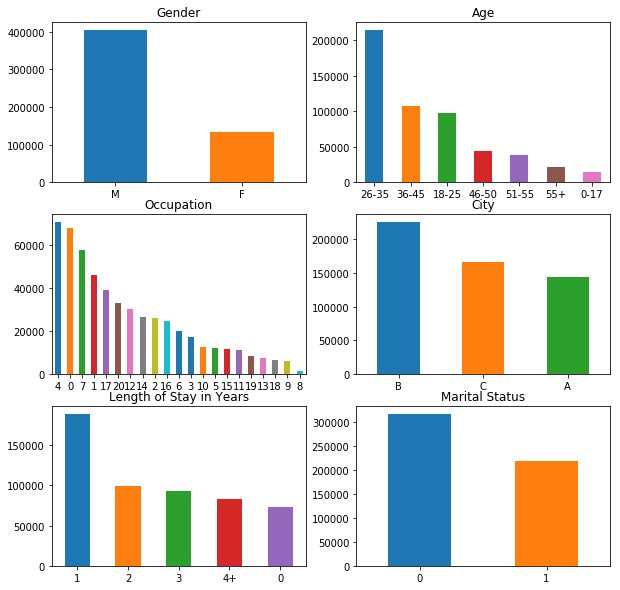

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
ax = df['Gender'].value_counts().plot(kind='bar',rot=0,title='Gender')

plt.subplot(3,2,2)
ax = df['Age'].value_counts().plot(kind='bar',rot=0,title='Age')

plt.subplot(3,2,3)
ax = df['Occupation'].value_counts().plot(kind='bar',rot=0,title='Occupation')

plt.subplot(3,2,4)
ax = df['City_Category'].value_counts().plot(kind='bar',rot=0,title='City')

plt.subplot(3,2,5)
ax = df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar',rot=0,title='Length of Stay in Years')

plt.subplot(3,2,6)
ax = df['Marital_Status'].value_counts().plot(kind='bar',rot=0,title='Marital Status')

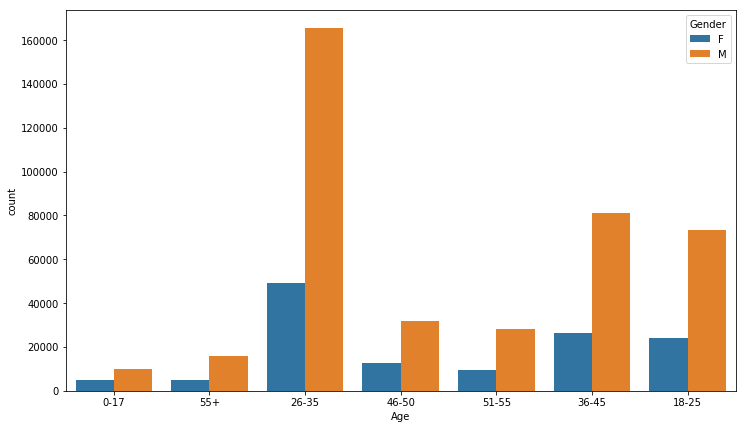

In [9]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['Age'],hue=df['Gender']);

In [10]:
df['Gender_Marital_Status'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['Gender_Marital_Status'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


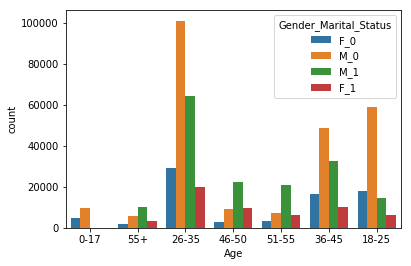

In [11]:
sns.countplot(df['Age'],hue=df['Gender_Marital_Status']);

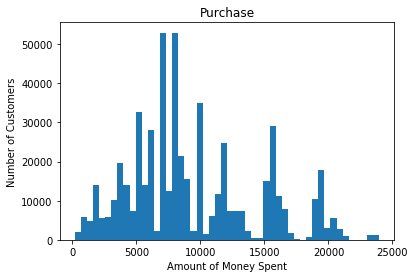

In [12]:
plt.hist(df['Purchase'], bins=50)
plt.title('Purchase')
plt.xlabel('Amount of Money Spent')
plt.ylabel('Number of Customers');

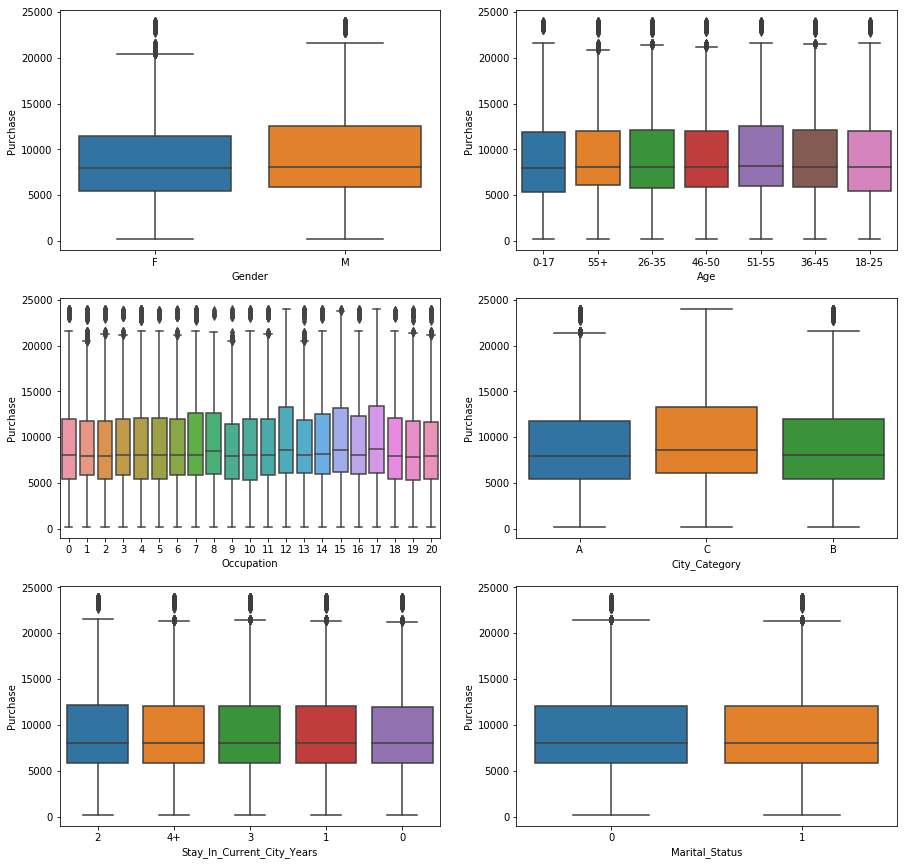

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)

plt.subplot(3,2,2)
sns.boxplot(x = 'Age', y = 'Purchase', data = df)

plt.subplot(3,2,3)
sns.boxplot(x = 'Occupation', y = 'Purchase', data = df)

plt.subplot(3,2,4)
sns.boxplot(x = 'City_Category', y = 'Purchase', data = df)

plt.subplot(3,2,5)
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df)

plt.subplot(3,2,6)
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = df);

In [14]:
all_females = df[df['Gender'] == 'F']
all_males = df[df['Gender'] == 'M']

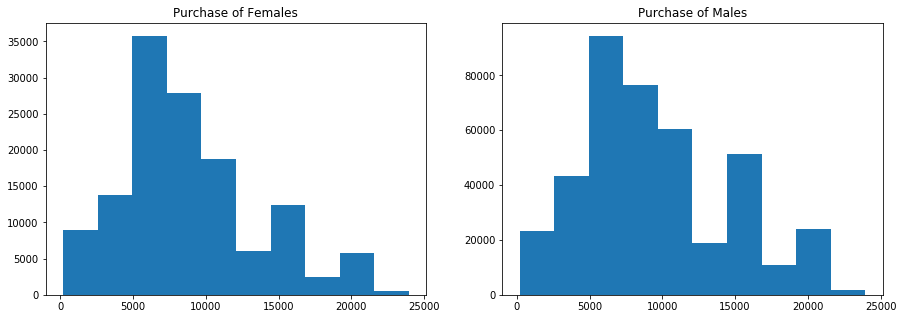

The mean purchase of females: $8809.76
The mean purchase of males: $9504.77
Purchase based on Gender T-test: Ttest_indResult(statistic=-45.67264701908008, pvalue=0.0)


In [15]:
from scipy.stats import ttest_ind
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(all_females['Purchase'])
plt.title('Purchase of Females')

plt.subplot(1,2,2)
plt.hist(all_males['Purchase'])
plt.title('Purchase of Males')
plt.show()

print("The mean purchase of females: ${0:.2f}".format(np.mean(all_females['Purchase'])))
print("The mean purchase of males: ${0:.2f}".format(np.mean(all_males['Purchase'])))
print("Purchase based on Gender T-test:", ttest_ind(all_females['Purchase'], all_males['Purchase'], equal_var=False))

In [16]:
all_married = df[df['Marital_Status'] == 1]
all_single = df[df['Marital_Status'] == 0]

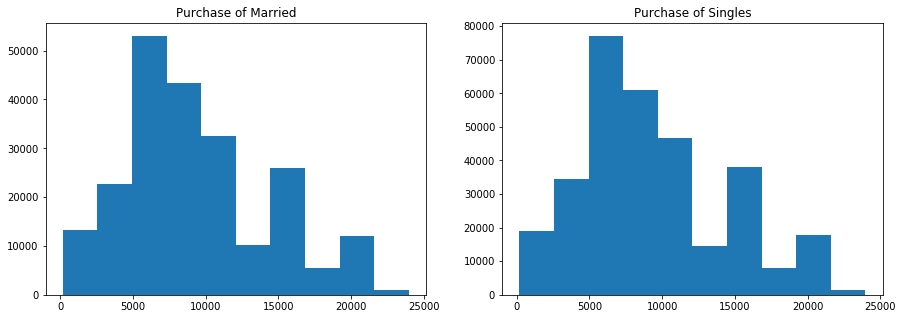

The mean purchase of married: $9334.63
The mean purchase of singles: $9333.33
Purchase based on Marital Status T-test: Ttest_indResult(statistic=0.09463132715737395, pvalue=0.9246077060850849)


In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(all_married['Purchase'])
plt.title('Purchase of Married')

plt.subplot(1,2,2)
plt.hist(all_single['Purchase'])
plt.title('Purchase of Singles')
plt.show()

print("The mean purchase of married: ${0:.2f}".format(np.mean(all_married['Purchase'])))
print("The mean purchase of singles: ${0:.2f}".format(np.mean(all_single['Purchase'])))
print("Purchase based on Marital Status T-test:", ttest_ind(all_married['Purchase'], all_single['Purchase'], equal_var=False))

In [18]:
df['Stay_In_Current_City_Years'].replace({'4+':'4'}, inplace=True)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Purchase'] = np.log(df['Purchase'])

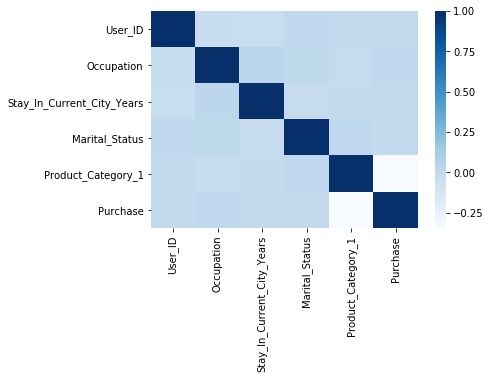

In [19]:
sns.heatmap(df.corr(),cmap='Blues');

In [20]:
df = pd.get_dummies(df, columns=['Gender','City_Category','Age',
                                 'Occupation','Product_Category_1',
                                 'Product_Category_2','Product_Category_3'])

df = df.drop(columns=['Product_ID','User_ID','Gender_Marital_Status'])

In [21]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

In [22]:
X = df.drop(columns=['Purchase'])
y = df.Purchase

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [28]:
# Lasso Regression
start_time = time.time()

lasso = linear_model.Lasso(alpha=.0001)
lasso.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 29.44121813774109 seconds ---


In [29]:
start_time = time.time()

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6597290654110618
0.6603339569929496
--- 0.5967309474945068 seconds ---


In [30]:
# Decision trees
from sklearn import tree

start_time = time.time()

decision_tree = tree.DecisionTreeRegressor(max_depth=15)
decision_tree.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 3.9761171340942383 seconds ---


In [31]:
start_time = time.time()

print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6779834703229066
0.6586786576091711
--- 0.6441705226898193 seconds ---


In [32]:
predictions = decision_tree.predict(X_test)

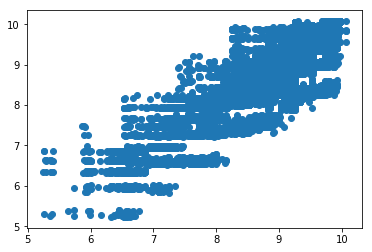

In [33]:
plt.scatter(x=predictions,y=y_test);

In [34]:
# Random Forest
from sklearn import ensemble

start_time = time.time()

rfr = ensemble.RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 37.601908922195435 seconds ---


In [35]:
start_time = time.time()

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.7806232951914699
0.6414414838616485
--- 3.01057505607605 seconds ---


In [36]:
# Gradient Boosting
start_time = time.time()

params = {'n_estimators': 500,
          'max_depth': 2}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 218.4750792980194 seconds ---


In [37]:
start_time = time.time()

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6639160047659454
0.6640292298852232
--- 6.99937629699707 seconds ---


In [65]:
# Set up and run PCA.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

C:\Users\Jillian\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jillian\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  import sys


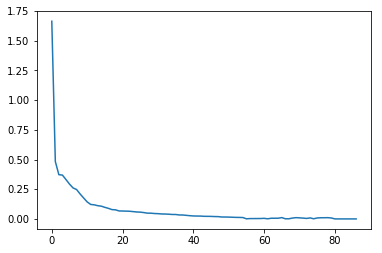

[ 1.66462051e+00  4.82768735e-01  3.72418306e-01  3.69204102e-01
  3.31710889e-01  2.93366951e-01  2.61103215e-01  2.47690327e-01
  2.09964618e-01  1.76253298e-01  1.43148864e-01  1.21697146e-01
  1.18790727e-01  1.11264836e-01  1.07264056e-01  9.73106586e-02
  8.90003476e-02  7.84006201e-02  7.65202851e-02  6.71831806e-02
  6.64579649e-02  6.56265183e-02  6.44819377e-02  6.14553134e-02
  5.84405667e-02  5.71444814e-02  5.34159527e-02  4.86211643e-02
  4.82391112e-02  4.54810779e-02  4.43339143e-02  4.17280338e-02
  4.11478462e-02  3.98028638e-02  3.74316187e-02  3.73056468e-02
  3.32499129e-02  3.29226473e-02  3.00526229e-02  2.71907125e-02
  2.48507682e-02  2.41926896e-02  2.39677374e-02  2.20482758e-02
  2.16404881e-02  2.12521915e-02  1.98143138e-02  1.94033146e-02
  1.60651470e-02  1.59827397e-02  1.52959105e-02  1.41295523e-02
  1.29676190e-02  1.24641974e-02  1.15317331e-02  7.76351764e-04
  2.94246543e-03  2.91440034e-03  3.18054065e-03  3.40319490e-03
  4.87931687e-03  1.08573

In [66]:
Xt = X.T
Cx = np.cov(Xt)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [79]:
#pca = PCA(n_components=20) 
#pca.fit(X_scaled)
#X_pca = pca.transform(X_scaled)

# PCA to keep 95% of variance
pca = PCA(0.95)

# Components required to keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Cumulative sum of explained variance by the components
var_cumsum=pca.explained_variance_ratio_.cumsum()
print(var_cumsum)
print('\n')
print('Need to keep {} components to explain 95% of the variance.'.format(len(var_cumsum)))

[0.0374557  0.06510382 0.08946969 0.11197343 0.13426309 0.15618551
 0.17726489 0.19723802 0.21660327 0.23562412 0.2543084  0.27276595
 0.28919902 0.30536577 0.3212314  0.33685871 0.35201254 0.36662558
 0.38112008 0.39530782 0.40871173 0.42199969 0.43507179 0.44803882
 0.46094089 0.47366278 0.48630292 0.4987761  0.51106019 0.52332313
 0.53554505 0.54763641 0.55968655 0.57164791 0.58353834 0.59541851
 0.60724829 0.61904451 0.63081353 0.64254528 0.65422379 0.66586873
 0.67749246 0.6890699  0.70062742 0.71213657 0.72363597 0.73512252
 0.74657141 0.75801838 0.76938611 0.78068685 0.79195398 0.80318238
 0.81427652 0.82516086 0.83597217 0.84661482 0.8569621  0.86712377
 0.87709875 0.88702603 0.89675715 0.90630389 0.91520908 0.92386801
 0.9320188  0.93979261 0.94744698 0.95474983]


Need to keep 70 components to explain 95% of the variance.


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=15)

In [83]:
# Lasso regression with PCA
lasso = linear_model.Lasso(alpha=.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6195378964908076
0.6214317603638101


In [85]:
# Decision tree with PCA
decision_tree = tree.DecisionTreeRegressor(max_depth=15)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [86]:
print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

0.6847730426337844
0.6541038981927965


In [87]:
# Random forest with PCA
rfr = ensemble.RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.7750380997636442
0.6448290808812824


In [89]:
# Gradient boosting with PCA
params = {'n_estimators': 500,
          'max_depth': 2}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.6511556787749682
0.6497272756980087
